In [1]:
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline

#time
import datetime as datetime

#Prophet
from fbprophet import Prophet


from sklearn import metrics

In [2]:
start = datetime.datetime(2015,1,5)
df_2492 = pdr.DataReader('2492.TW', 'yahoo', start=start)
df_2492.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,17.153900,16.943001,17.153900,17.153900,1136512.0,15.927438
2015-01-06,17.013300,16.661800,16.943001,16.661800,1451577.0,15.470522
2015-01-07,16.732100,16.240000,16.661800,16.450899,1773755.0,15.274700
2015-01-08,16.802401,16.591499,16.591499,16.661800,1169227.0,15.470522
2015-01-09,16.872700,16.661800,16.802401,16.802401,680627.0,15.601070


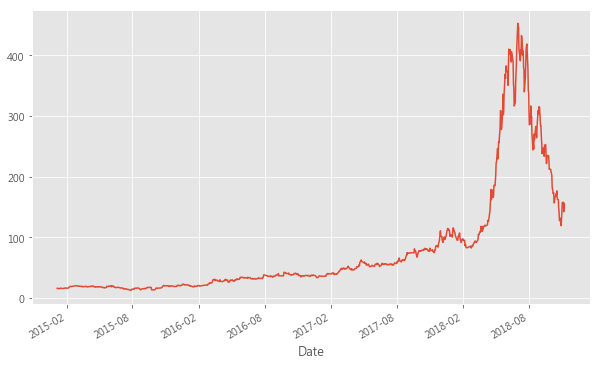

In [3]:
plt.style.use('ggplot')
df_2492['Adj Close'].plot(figsize=(10, 6));

In [4]:
new_df_2492 = pd.DataFrame(df_2492['Adj Close']).reset_index().rename(columns={'Date':'ds', 'Adj Close':'y'})
new_df_2492.head()

,ds,y
0,2015-01-05,15.927438
1,2015-01-06,15.470522
2,2015-01-07,15.274700
3,2015-01-08,15.470522
4,2015-01-09,15.601070


In [5]:
new_df_2492['y'] = np.log(new_df_2492['y'])
# 定義模型
model = Prophet()

# 訓練模型
model.fit(new_df_2492)

# 建構預測集
future = model.make_future_dataframe(periods=365) #forecasting for 1 year from now.

# 進行預測
forecast = model.predict(future)

forecast.head()


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\lasts\Anaconda2\envs\env_Python3.6\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-05,3.264934,2.731216,2.928141,3.264934,3.264934,-0.438296,-0.438296,-0.438296,0.110991,0.110991,0.110991,-0.549288,-0.549288,-0.549288,0.0,0.0,0.0,2.826637
1,2015-01-06,3.267400,2.723243,2.917495,3.267400,3.267400,-0.444292,-0.444292,-0.444292,0.112516,0.112516,0.112516,-0.556808,-0.556808,-0.556808,0.0,0.0,0.0,2.823108
2,2015-01-07,3.269867,2.721153,2.917697,3.269867,3.269867,-0.451942,-0.451942,-0.451942,0.112294,0.112294,0.112294,-0.564236,-0.564236,-0.564236,0.0,0.0,0.0,2.817925
3,2015-01-08,3.272333,2.716584,2.911510,3.272333,3.272333,-0.457714,-0.457714,-0.457714,0.113781,0.113781,0.113781,-0.571496,-0.571496,-0.571496,0.0,0.0,0.0,2.814619
4,2015-01-09,3.274800,2.709264,2.904253,3.274800,3.274800,-0.467294,-0.467294,-0.467294,0.111218,0.111218,0.111218,-0.578512,-0.578512,-0.578512,0.0,0.0,0.0,2.807506


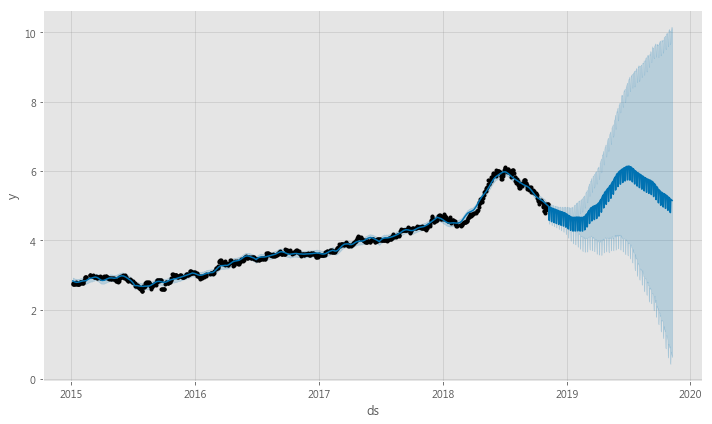

In [6]:
figure=model.plot(forecast)

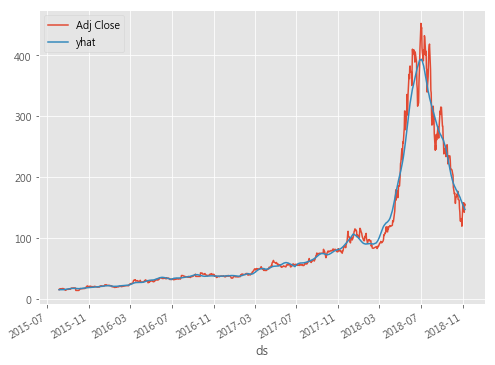

In [7]:
df_2492_close = pd.DataFrame(df_2492['Adj Close'])
two_years = forecast.set_index('ds').join(df_2492_close)
two_years = two_years[['Adj Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)
two_years[['Adj Close', 'yhat']].plot(figsize=(8, 6));

In [8]:
two_years_AE = (two_years.yhat - two_years['Adj Close'])
two_years_AE.describe()

count    800.000000
mean      -1.451949
std       14.302471
min      -88.053614
25%       -2.389504
50%        0.129703
75%        2.074819
max       64.853188
dtype: float64

In [9]:
print ("MSE:",metrics.mean_squared_error(two_years.yhat, two_years['Adj Close']))


MSE: 206.41313426786152


In [10]:
print ("MAE:",metrics.mean_absolute_error(two_years.yhat, two_years['Adj Close']))


MAE: 7.052998896728383


Text(0.5,0,'Date')

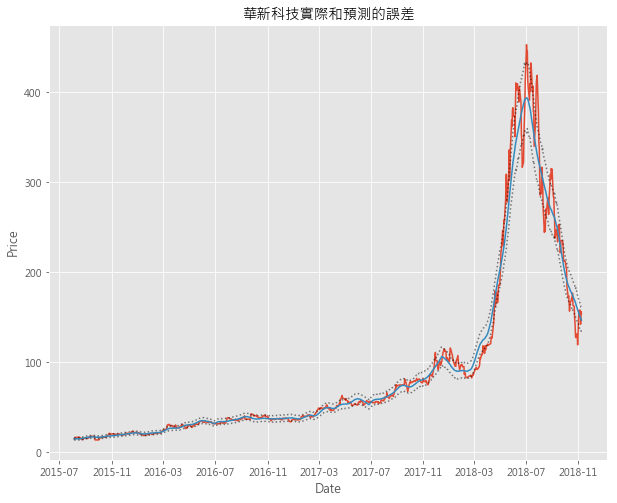

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.plot(two_years['Adj Close'])
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('華新科技實際和預測的誤差')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

In [37]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\lasts\\Anaconda2\\envs\\env_Python3.6\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'